<img src="https://gallery.yopriceville.com/var/resizes/Free-Clipart-Pictures/Police-PNG/Police_Line_Transparent_PNG_Clip_Art_Image.png?m=1527240027" alt="Police line image" height="50%" width="100%">

# Contents

* ## [Presentation. Intro](#Presentation.-Intro)
    Problem. Importance. Data. Pipeline. Technologies.
    
* ## [Presentation. Insights](#Presentation.-Insights)
    Trends. Maps. Description, Visualisation, and Visual representation of selected features.
    
    * [Presentation. Insights. Trends](#Trends)
    * [Presentation. Insights. Geo](#Geo)
    
<img src="https://gallery.yopriceville.com/var/resizes/Free-Clipart-Pictures/Police-PNG/Police_Line_Transparent_PNG_Clip_Art_Image.png?m=1527240027" alt="Police line image" height="50%" width="100%">

# Presentation. Intro

### What problem is solving here?
* Community policing progressives want and try to **advance policing** [\[1\]](https://www.policedatainitiative.org/about/). But less than half of the major police departments participating in the initiative now. We want to show at least the limited pool of insights stakeholders of all interests may gather from publishing their data.

***

### Why is it important?
	
* To **increase** the transparency of public safety-related policy-making & budget planning via data analysis. 
    * To make a **public audit** of FBI reports.
* To **utilize** important public data & to inform tourists and locals about the safety of a city part and outcomes of taxation.
* To **support** initiative of progressive police departments via 'citizen'-data-analysis.
***

### What data are used here?

**Source**: contribution of Detroit, MI to [“Police Data Initiative”](https://www.policedatainitiative.org/datasets/incidents/`)

**Nature**: reports from police information management system

**Sample**:

<img src="https://i.imgur.com/FmssEbN.png" alt="Pipeline" height="40%" width="80%">

***

### What processing and analytics pipelines are used to solve a problem?

<img src="https://i.imgur.com/HD8ek3s.png" alt="Pipeline" height="40%" width="70%">

<ol>
    <li> Preprocessing: </li>
        <ol>
        <li> Raw data cleaning and feature engineering. Python is used </li>
        <li> Load data to MongoDB in cloud </li>
        </ol>
    <li> Analytics and visualizations: </li>
        <ol>
        <li> Access the data from everywhere. Python is used </li>
        <li> Analitics. Python used </li>
        <li> Visualisation. Python, kepler.gl for 3d are used </li>
        </ol>
    <li> Presentations of trends and insight </li>
        <ol>
        <li> Jupyter notebook is used </li>
        <li> Power Point is used </li>
        <li> Thematic web site is used </li>
        </ol>
</ol>

***

### What technologies are used to solve a problem?
<img src="https://i.imgur.com/UfbNSDa.png" alt="Technologies used" height="50%" width="90%">

***

# Presentation. Insights

## Trends

### General insights:
* **Numer of reported crimes**:
    * The median **number of offenses** registered **per year** is equals to $81 400$;
    * The median **number of offenses** registered **per hour per year** is equals $2175$

* **Zip codes of reported offenses**
    * $50%$ of Detroit's zip codes have more than $7740$ offenses registered during the whole period, 
    * $15%$ of Detroit's zip codes have less than $2200$ offenses registered during the whole period

* **Reported crimes by day and by week distributions**
    * The **distribution** of offenses registered **per day of the week** of the whole period:
        * Hour with the most number is **4.00 AM** (Detroit time). 
    * The **hour distribution** of offenses registered per the whole period:
        * The weekday with the most number of crimes reported is **Friday** (Detroit time). 
    
| Per hour | Per weekday |
|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| <img src="https://i.imgur.com/jKAGu5F.png" alt="By hour" height="30%" width="100%"> | <img src="https://i.imgur.com/HSDliZL.png" alt="By weekday" height="30%" width="100%"> |

**SEX related**:
* Prostitution is active on Wednesday, Friday and Tuesday (in order of increasing), in the evening at night, while another week is Criminal Sexual Conduct 2nd and 4th degree. There are up to 3 most active prostitution-related offenses addresses.
    * Wednesday is a day of Oral/Anal Criminal Sexual Conducts and Penis/Vagina Criminal Sexual Conducts day is Saturday.
    * * East part is strangely related to sex-related offenses.

**General**:
* Car thefts are active the whole week

**To reproduce the numbers**:
* `df.groupby(['year']).crime_id.count().quantile(0.5)`
* `df.groupby(['year', 'incident_timestamp_dt_hour']).crime_id.count().median()`

* `df.groupby('incident_timestamp_dt_hour').crime_id.count().plot.bar()`
* `df.groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
* `this plots are upper at a file`
* `df[(df.offense_description.str.contains('PROSTITUT'))].groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
* `df[df.offense_category.str.contains('SEX OFFENSES')].groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
* `df[(df.offense_description.str.contains('PROSTITUT'))].groupby(['X', 'Y']).count().crime_id.sort_values()`
* `df[(df.offense_description.str.contains('PROSTITUT'))].groupby(['address']).count().crime_id.sort_values()

***

## Code

Load data untraditional way, connect to DB

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import src.db_connector

PATH_TO_PROC_DATA = 'data\\interim\\'

In [2]:
%%time
LOAD_REQ = False
if LOAD_REQ == True:
    df = pd.DataFrame(src.db_connector.get_many_items('crimes', 'detroit')) # return iterator, so need container
else:
    df = pd.read_csv(PATH_TO_PROC_DATA + 'RMS_Crime_Incidents_modified.csv', index_col=0, low_memory=False)

Wall time: 2min 5s


In [36]:
# https://stackoverflow.com/questions/18548370/pandas-can-only-compare-identically-labeled-dataframe-objects-error
# from pandas.util.testing import assert_frame_equal
# df_aux = pd.read_csv(PATH_TO_PROC_DATA + 'RMS_Crime_Incidents_modified.csv', index_col=0, low_memory=False)
# assert_frame_equal(df.iloc[:, 2:].reset_index(drop=True), df_aux.reset_index(drop=True))

**Example of powerful viz package.**

In [2]:
# # example of data shader use. It may be useful because of speed and visualization style.
# # https://datashader.org/
# import datashader as ds
# import datashader.transfer_functions as tf
# cvs = ds.Canvas(plot_width=400, plot_height=400)
# agg = cvs.points(df, 'X', 'Y')
# img = tf.shade(agg, cmap=['lightblue', 'darkblue'], how='eq_hist')

_Usefull links_

In [3]:
# https://github.com/CityOfDetroit/midas-2020
# https://drive.google.com/file/d/1W59wB0HQF6piCo1KIf9IBPkoEbiqGWg_/view

# https://www.metrotimes.com/news-hits/archives/2018/03/06/this-interactive-map-allows-you-to-see-every-single-reported-crime-in-detroit
# https://spotcrime.com/mi/detroit

# # predictive analitics for police
# https://www.predpol.com/law-enforcement/#predPolicing

# https://www.metrotimes.com/news-hits/archives/2018/03/06/this-interactive-map-allows-you-to-see-every-single-reported-crime-in-detroit
# https://spotcrime.com/mi/detroit

# #d detroit crimes viewer
# https://cityofdetroit.github.io/crime-viewer/

# !!!! Classification of offences

# https://www.atlantapd.org/i-want-to/crime-data-downloads
# https://www.atlantapd.org/Home/ShowDocument?id=220
# https://www.atlantapd.org/Home/ShowDocument?id=2881

# https://www.policefoundation.org/wp-content/uploads/2016/12/CMAN-Issue-5.pdf
# https://www.policefoundation.org/publication/5-things-on-analyzing-police-traffic-stop-data/
# https://www.policedatainitiative.org/wp-content/uploads/2017/10/5Things_PDI_9-29-17_final.pdf

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
PATH_TO_PROC_DATA = 'data\\interim\\'
df = pd.read_csv(PATH_TO_PROC_DATA + 'RMS_Crime_Incidents_modified.csv', index_col=0)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Make dataviz
_Let's plot some auxilary statistics plots, which will be applied to general insights._

Some interesting insights:

**SEX related**:
* Prostitution is active on Wednesday, Friday and Tuesday (in order of increasing), in the evening at night, while another week is Criminal Sexual Conduct 2nd and 4th degree. There are up to 3 most active prostitution related offences adressed.
    * Wednesday is a day of Oral/Anal Criminal Sexual Conducts and Penis/Vagina Criminal Sexual Conducts day is Saturday.
    * East part is strangely related to sex-related offenses.

**General**:
* Car thefts are active the whole week

`df[(df.offense_description.str.contains('PROSTITUT'))].groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
`df[df.offense_category.str.contains('SEX OFFENSES')].groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar()`
`df[(df.offense_description.str.contains('PROSTITUT'))].groupby(['X', 'Y']).count().crime_id.sort_values()`
`df[(df.offense_description.str.contains('PROSTITUT'))].groupby(['address']).count().crime_id.sort_values()`

Overall offense number per different times:
* Per month of a year
* Per day of a month
* Per day of a week
* Per hour of a day

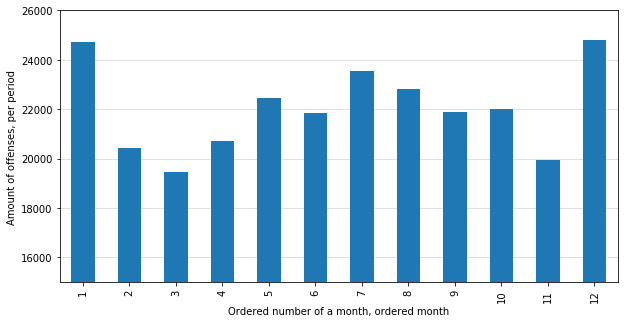

In [40]:
df.groupby('incident_timestamp_dt_month').crime_id.count().plot.bar(ylim=(15000,26000), zorder=2,
                                                                         figsize=(10, 5))
plt.xlabel('Ordered number of a month, ordered month')
plt.ylabel('Amount of offenses, per period')
plt.grid(alpha=0.5, axis='y', zorder=-1)
# plt.savefig('overall_per_month_detroit_time.png', dip=400)

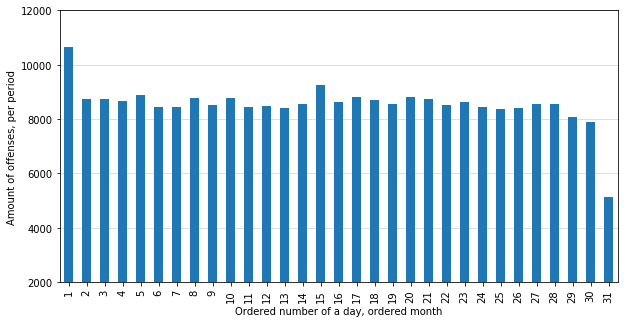

In [41]:
df.groupby('incident_timestamp_dt_day_of_month').crime_id.count().plot.bar(ylim=(2000,12000), zorder=2,
                                                                         figsize=(10, 5))
plt.xlabel('Ordered number of a day, ordered month')
plt.ylabel('Amount of offenses, per period')
plt.grid(alpha=0.5, axis='y', zorder=-1)
#plt.savefig('overall_per_day_of_month_detroit_time.png', dip=400)

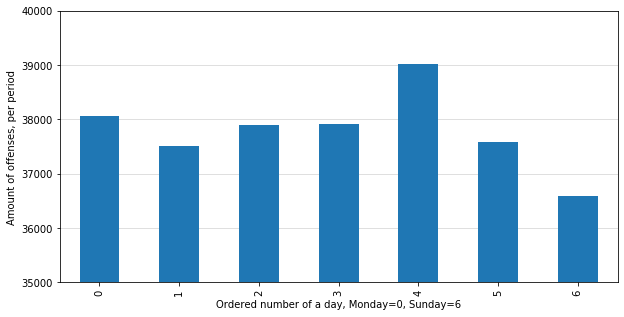

In [42]:
df.groupby('incident_timestamp_dt_day_of_week').crime_id.count().plot.bar(ylim=(35000,40000), zorder=2,
                                                                         figsize=(10, 5))
plt.xlabel('Ordered number of a day, Monday=0, Sunday=6')
plt.ylabel('Amount of offenses, per period')
plt.grid(alpha=0.5, axis='y', zorder=-1)
# plt.savefig('overall_per_weekday_detroit_time.png', dip=400)

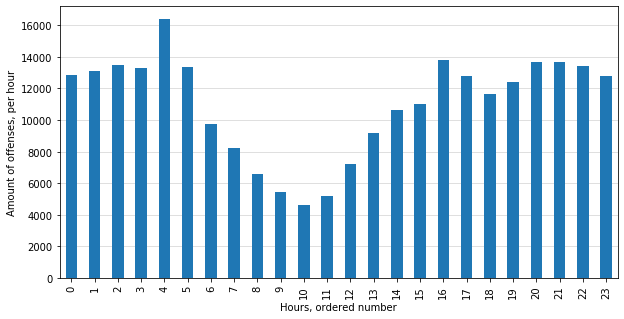

In [43]:
df.groupby(['incident_timestamp_dt_hour']).crime_id.count().plot.bar(zorder=2,
                                                                         figsize=(10, 5))
plt.xlabel('Hours, ordered number')
plt.ylabel('Amount of offenses, per hour')
plt.grid(alpha=0.5, axis='y', zorder=-1)
# plt.savefig('overall_per_hour_detroit_time.png', dip=400)

## Geo

# The amount of offences per each 30 minute window of a period
_Look at the peaks point. Look at the geo-distribution. Be familiar with the cities' parts_

**OPEN KEPLER-BASED DINAMIC VIZ** -> https://kepler.gl/demo/map?mapUrl=https://dl.dropboxusercontent.com/s/u0aqfbui3muxmoq/keplergl_2ndwn6n.json

***

# Scatters of all reported crimes per year
_Geospatial-distribution of offenses per years_

We have reported crimes its geolocation. So, we may map it. _Also, the inner parts are not non-crimes parts._

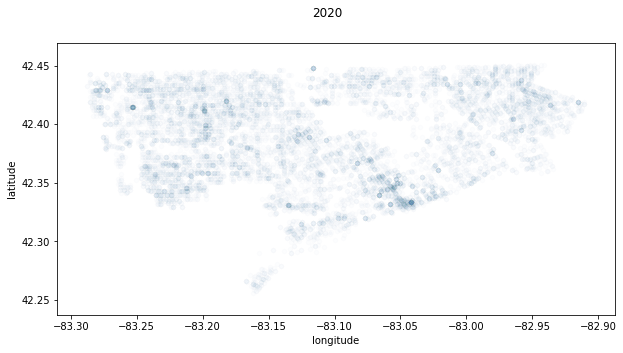

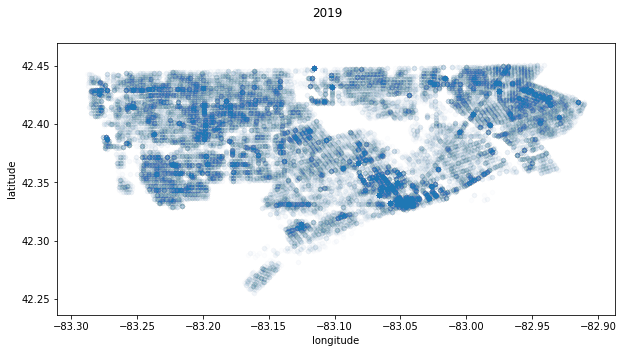

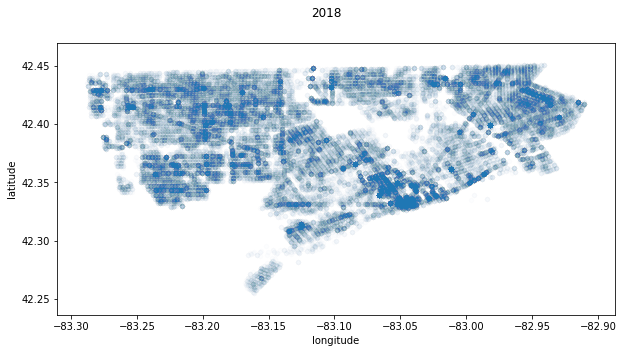

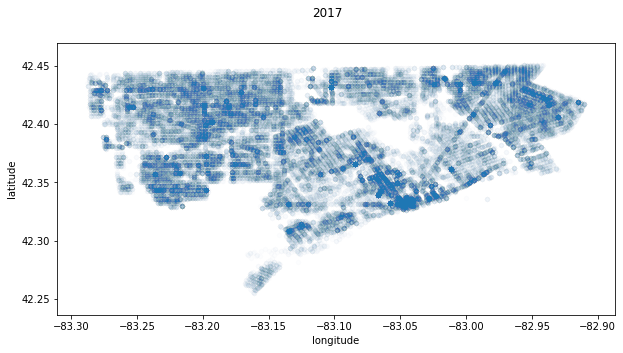

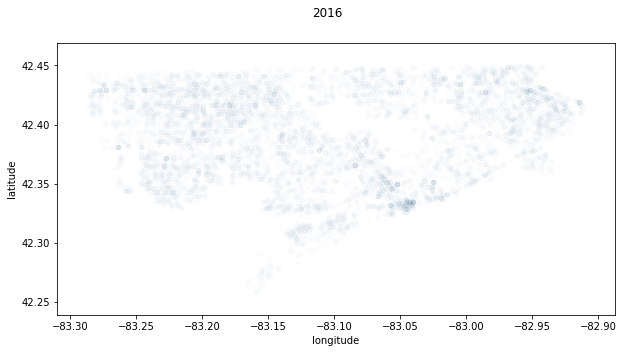

In [45]:
for indx, year in enumerate(sorted(df.year.unique(), reverse=True)):
    df[df.year == year].plot.scatter(x='longitude', y='latitude', figsize=(10, 5), alpha=0.011);
    plt.suptitle(year)
#     plt.savefig(PATH_TO_IMAGES + 'scatters_{}.png'.format(year), dip=600)
#     break
plt.show()

***

# Density evaluation of reported crimes for "Inner cities" of Detroit
_Data is not provided but the problem is. Try to evaluate the offenses' amount of inner but non-accountable parts_

Historically, Both **Hamtramck and Highland Park** weren't the parts of Detroit, thus they don't related to the Detroit Police Departmentб its statistics and even its duty, so we haven't got a precise number of offenses from the two regions inside of a Detroit 

But we understand that these old borders do not stop the crimes.

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'figsize'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\sit

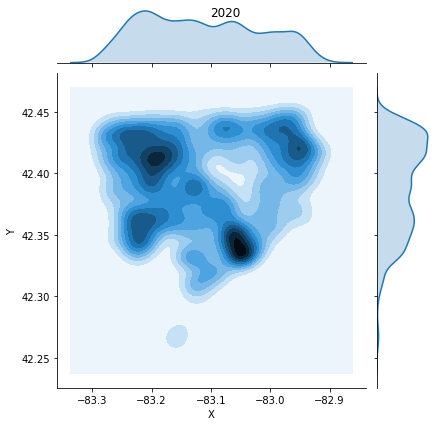

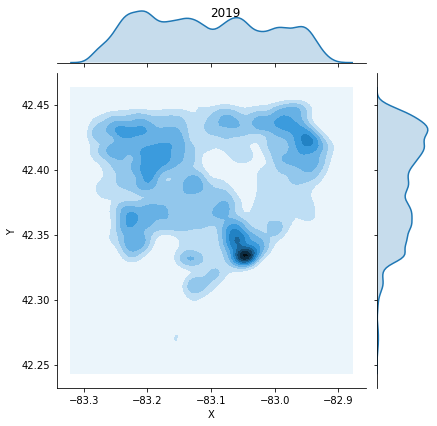

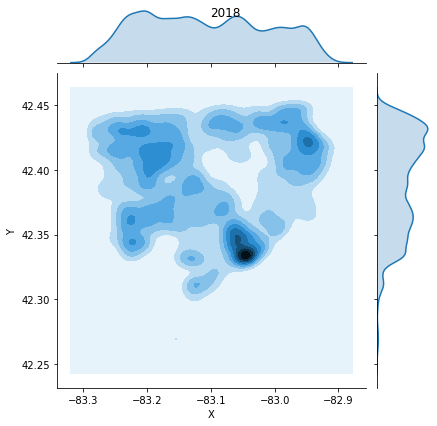

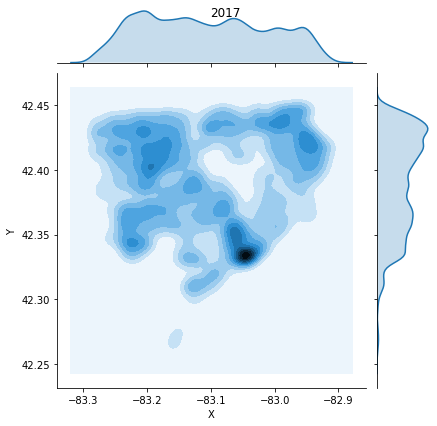

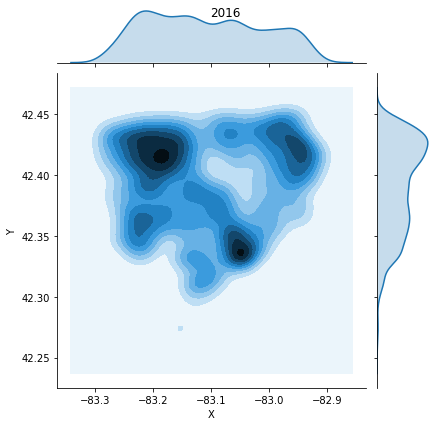

Wall time: 2min 16s


In [48]:
%%time
for indx, year in enumerate(sorted(df.year.unique(), reverse=True)):
    g = sns.jointplot(df[df.year == year]['X'], df[df.year == year]['Y'], kind='kde', figsize=(20, 20)) # aplha=0.005
    plt.suptitle(year);
#     g.savefig(PATH_TO_IMAGES + 'density_evaluation_{}.png'.format(year), dip=600)
#     break
plt.show()

***

# Reported crimes by its category against
_There are several types of offenses_

Geolocation based density-distribution of offenses grouped by its meta-category from the National Incident-Based Reporting System:
* Against person
* Against society
* Against property

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'figsize'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\sit

Wall time: 39.7 s


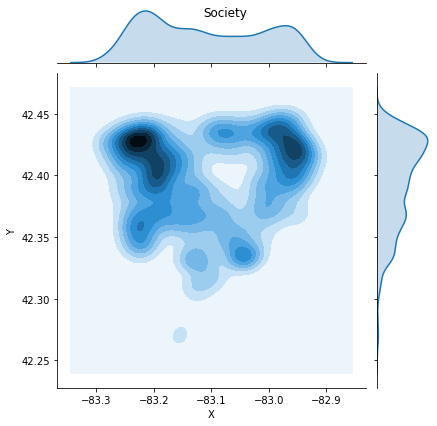

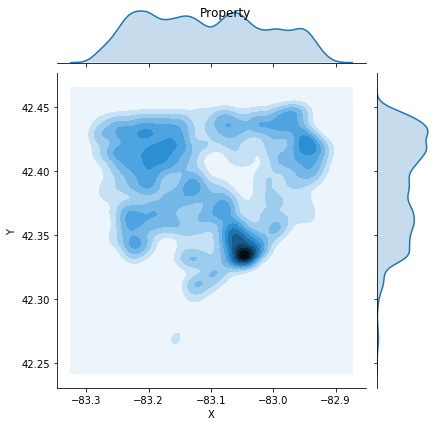

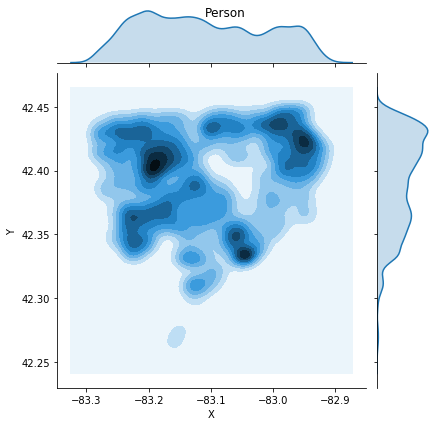

In [49]:
%%time
for cat_ag in sorted(df['Crime Against'].unique(), reverse=True)[0:3]:
    try: # becouse the probable oversize of points lets take a sample
        df_to_plot = df[df['Crime Against'] == cat_ag].sample(40000)
        sns.jointplot(df_to_plot[df_to_plot['Crime Against'] == cat_ag]['X'], 
                      df_to_plot[df_to_plot['Crime Against'] == cat_ag]['Y'], kind='kde',  
                      figsize=(20, 20))
    except:
        sns.jointplot(df[df['Crime Against'] == cat_ag]['X'], df[df['Crime Against'] == cat_ag]['Y'], kind='kde', 
                      figsize=(20, 20))
    plt.suptitle(cat_ag);
#     plt.savefig(PATH_TO_IMAGES + 'by_category_{}.png'.format(cat_ag), dip=800) 